In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn

In [44]:
def process_json_output(filename, stock_conc, protein_prep):
    output = json.load(open(filename))
    df_array = []
    for key in output:
        for value in output[key]:
            df_array.append([key, value])
    df = pd.DataFrame(df_array, columns=["condition", "cf"])
    df["concentration"] = stock_conc / df["condition"].astype(int)
    df["prep"] = protein_prep
    return df

In [51]:
FL_df = pd.read_csv("FL_output.csv")

In [53]:
core_df = process_json_output("FL_output.json", 28, "CORE")

In [57]:
idr_df = process_json_output("output.json", 152, "IDR")

In [58]:
idr_df.to_csv("idr_output.csv")

In [56]:
core_df.to_csv("core_output.csv")

In [54]:
core_df

,condition,cf,concentration,prep
0,128,0.006368,0.21875,CORE
1,128,0.005572,0.21875,CORE
2,128,0.005075,0.21875,CORE
3,128,0.025868,0.21875,CORE
4,128,0.012934,0.21875,CORE
...,...,...,...,...
59,8,0.019551,3.50000,CORE
60,8,0.022599,3.50000,CORE
61,8,0.023203,3.50000,CORE
62,8,0.023631,3.50000,CORE


In [62]:
df = pd.concat([FL_df, core_df, idr_df])

In [63]:
df

,Unnamed: 0,condition,cf,concentration,prep
0,0.0,128,0.020009,0.882812,FL
1,1.0,128,0.021557,0.882812,FL
2,2.0,128,0.017316,0.882812,FL
3,3.0,128,0.018166,0.882812,FL
4,4.0,128,0.000000,0.882812,FL
...,...,...,...,...,...
71,NaN,8,0.002375,19.000000,IDR
72,NaN,8,0.000000,19.000000,IDR
73,NaN,8,0.001461,19.000000,IDR
74,NaN,8,0.001376,19.000000,IDR


In [47]:
FL_df.to_csv("FL_output.csv")

Text(0, 0.5, 'Condensed Fraction')

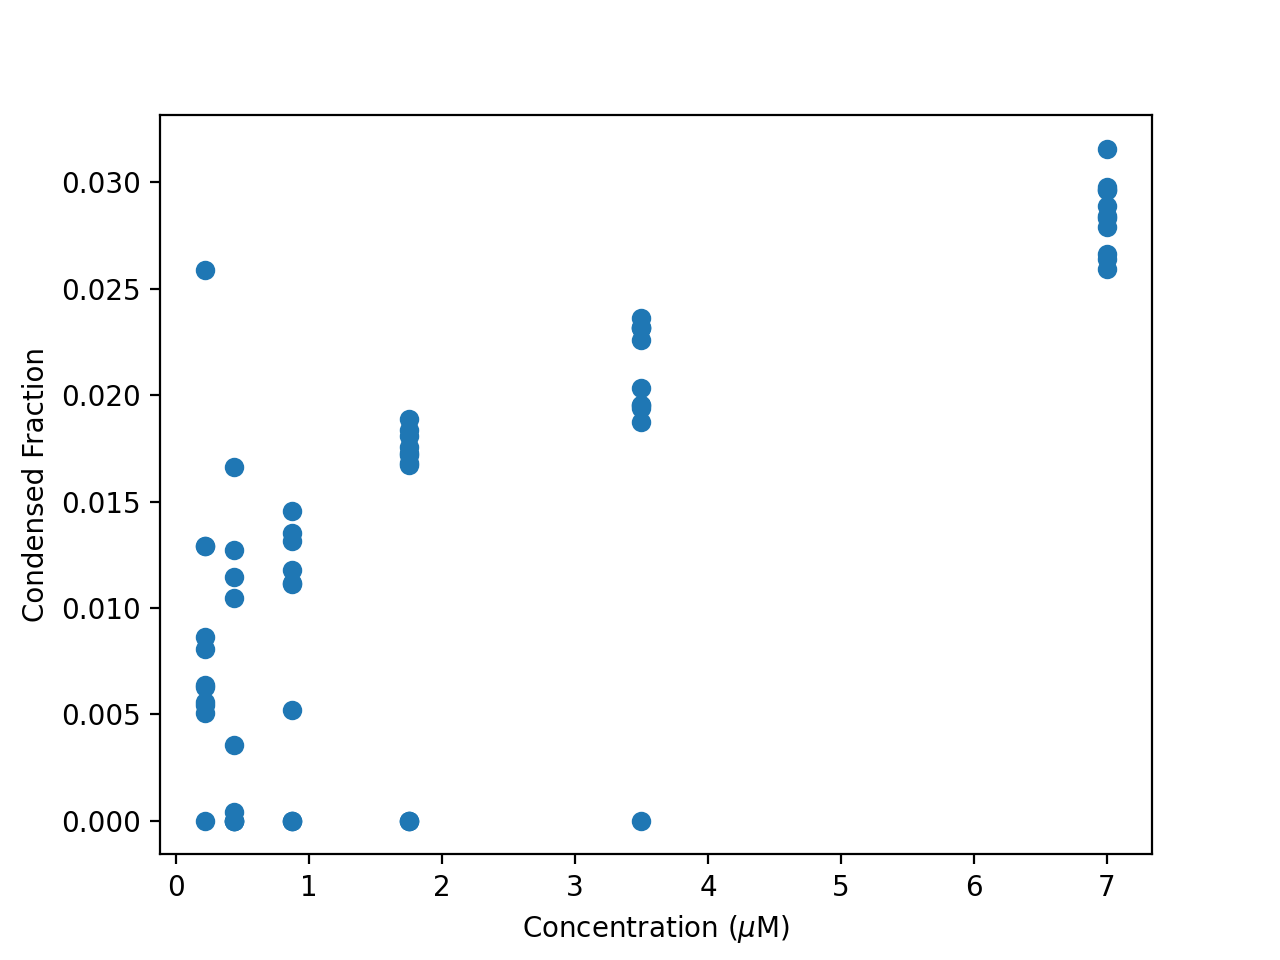

In [55]:

fig, ax = plt.subplots()

ax.plot(df["concentration"], df["cf"], 'o')
# Set axis legends
ax.set_xlabel("Concentration ($\mu$M)")
ax.set_ylabel("Condensed Fraction")

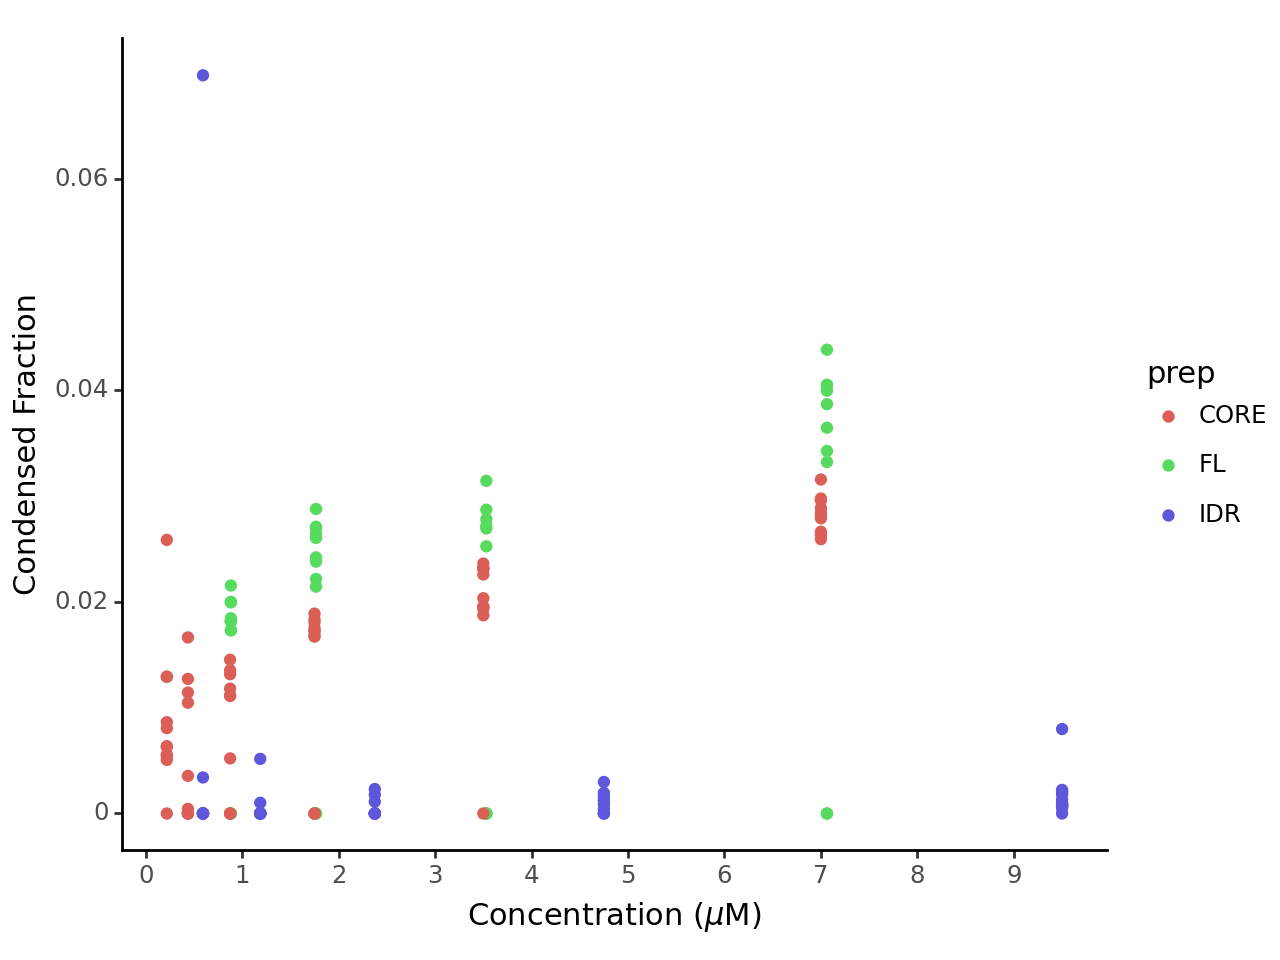

<Figure Size: (640 x 480)>

In [69]:

temp = df[df["concentration"] < 10]
plot = (
        pn.ggplot(temp, pn.aes(x="concentration", y="cf", color="prep"))
        + pn.geom_point()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction")
        # Add more ticks on x axis
        + pn.scale_x_continuous(breaks=[x for x in range(0, 12, 1)])
        + pn.theme_classic()
)

plot

In [70]:
pn.ggsave(plot, "all_output_2.png", dpi=1200, width=6, height=4, units="in", verbose=False)

In [11]:
condensed_fractions = pd.read_csv("data/condensed_fractions.csv")

In [12]:
condensed_fractions

,condensed_fraction,prep,dir_name,image_name
0,0.010989,TFIIB FL,128,128_004
1,0.011270,TFIIB FL,128,128_005
2,0.008158,TFIIB FL,128,128_006
3,0.007844,TFIIB FL,128,128_007
4,0.006930,TFIIB FL,128,128_008
...,...,...,...,...
60,0.134678,TFIIB FL,8,8_0019
61,0.130415,TFIIB FL,8,8_0020
62,0.102521,TFIIB FL,8,8_0021
63,0.104999,TFIIB FL,8,8_0022


In [13]:
regions = pd.read_csv("data/regions.csv")

In [14]:
regions

,area,mean_intensity,perimeter,prep,dir_name,image_name
0,2.0,1.0,0.000000,TFIIB FL,128,128_004
1,8.0,1.0,6.000000,TFIIB FL,128,128_004
2,1.0,1.0,0.000000,TFIIB FL,128,128_004
3,39.0,1.0,22.863961,TFIIB FL,128,128_004
4,72.0,1.0,30.727922,TFIIB FL,128,128_004
...,...,...,...,...,...,...
45104,146.0,1.0,52.520815,TFIIB FL,8,8_0023
45105,52.0,1.0,31.656854,TFIIB FL,8,8_0023
45106,42.0,1.0,32.621320,TFIIB FL,8,8_0023
45107,1.0,1.0,0.000000,TFIIB FL,8,8_0023


In [15]:
regions["conc"] = 113 / regions["dir_name"]

In [16]:
regions

,area,mean_intensity,perimeter,prep,dir_name,image_name,conc
0,2.0,1.0,0.000000,TFIIB FL,128,128_004,0.882812
1,8.0,1.0,6.000000,TFIIB FL,128,128_004,0.882812
2,1.0,1.0,0.000000,TFIIB FL,128,128_004,0.882812
3,39.0,1.0,22.863961,TFIIB FL,128,128_004,0.882812
4,72.0,1.0,30.727922,TFIIB FL,128,128_004,0.882812
...,...,...,...,...,...,...,...
45104,146.0,1.0,52.520815,TFIIB FL,8,8_0023,14.125000
45105,52.0,1.0,31.656854,TFIIB FL,8,8_0023,14.125000
45106,42.0,1.0,32.621320,TFIIB FL,8,8_0023,14.125000
45107,1.0,1.0,0.000000,TFIIB FL,8,8_0023,14.125000


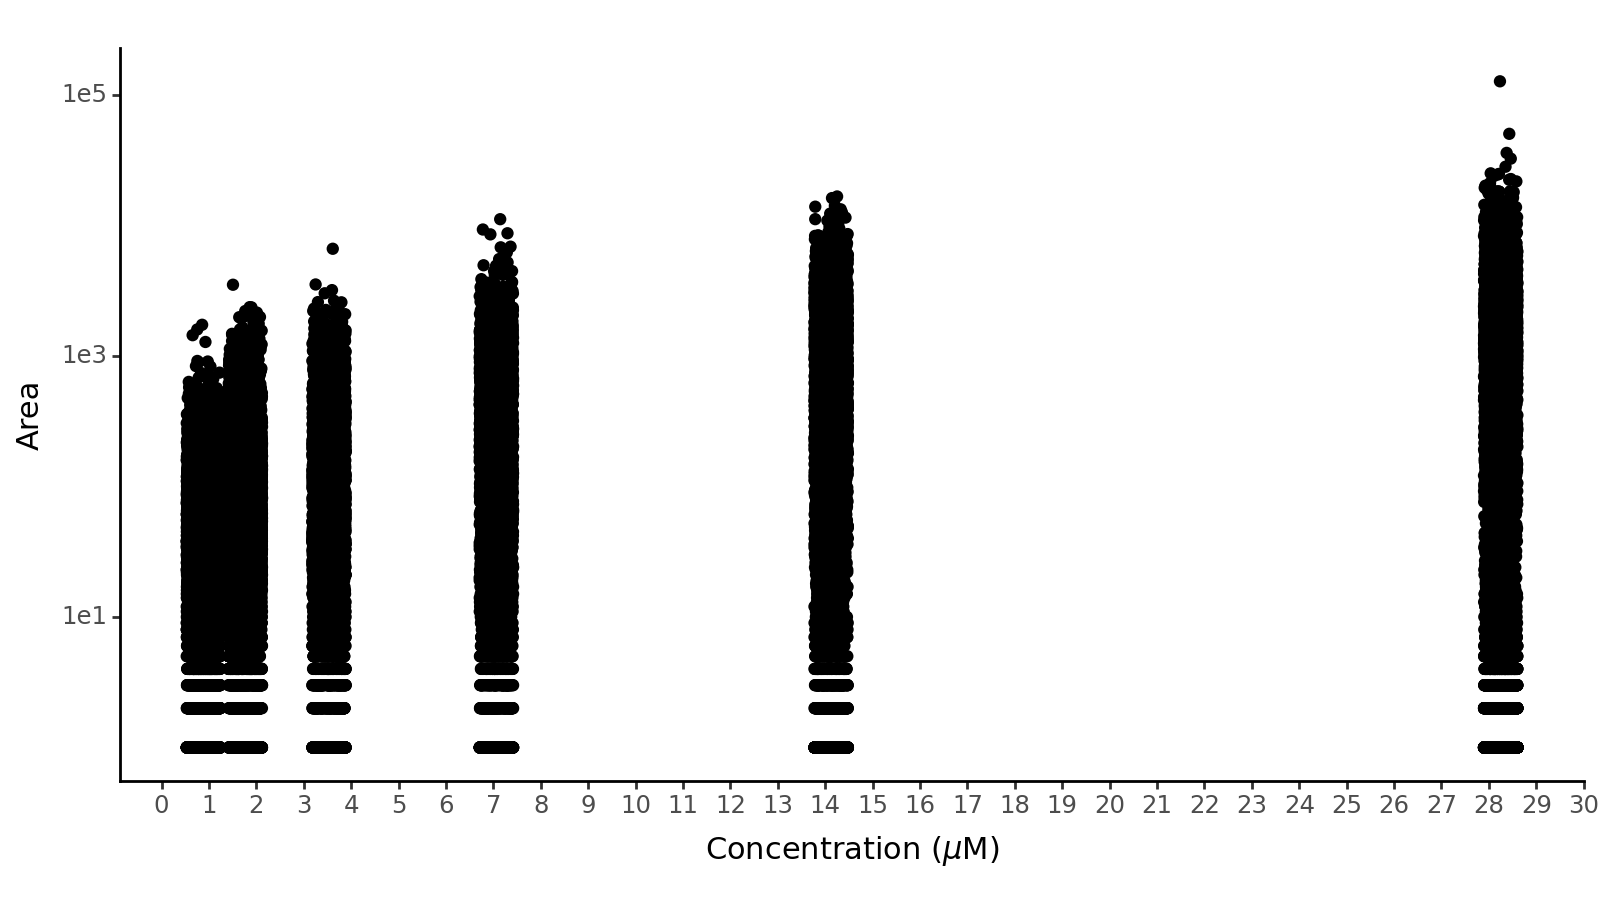

<Figure Size: (800 x 450)>

In [35]:
(
        pn.ggplot(regions, pn.aes(x="conc", y="area", group="conc"))
        + pn.geom_jitter()
        + pn.labs(x="Concentration ($\mu$M)", y="Area")
        + pn.scale_y_log10()
        # Add more ticks on x axis
        + pn.scale_x_continuous(breaks=[x for x in range(0, 40, 1)])
        + pn.theme_classic()
        + pn.theme(figure_size=(8, 4.5))
)

In [46]:
condensed_fractions["conc"] = 113 / condensed_fractions["dir_name"]
condensed_fractions["log_cf"] = np.log2(condensed_fractions["condensed_fraction"])

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


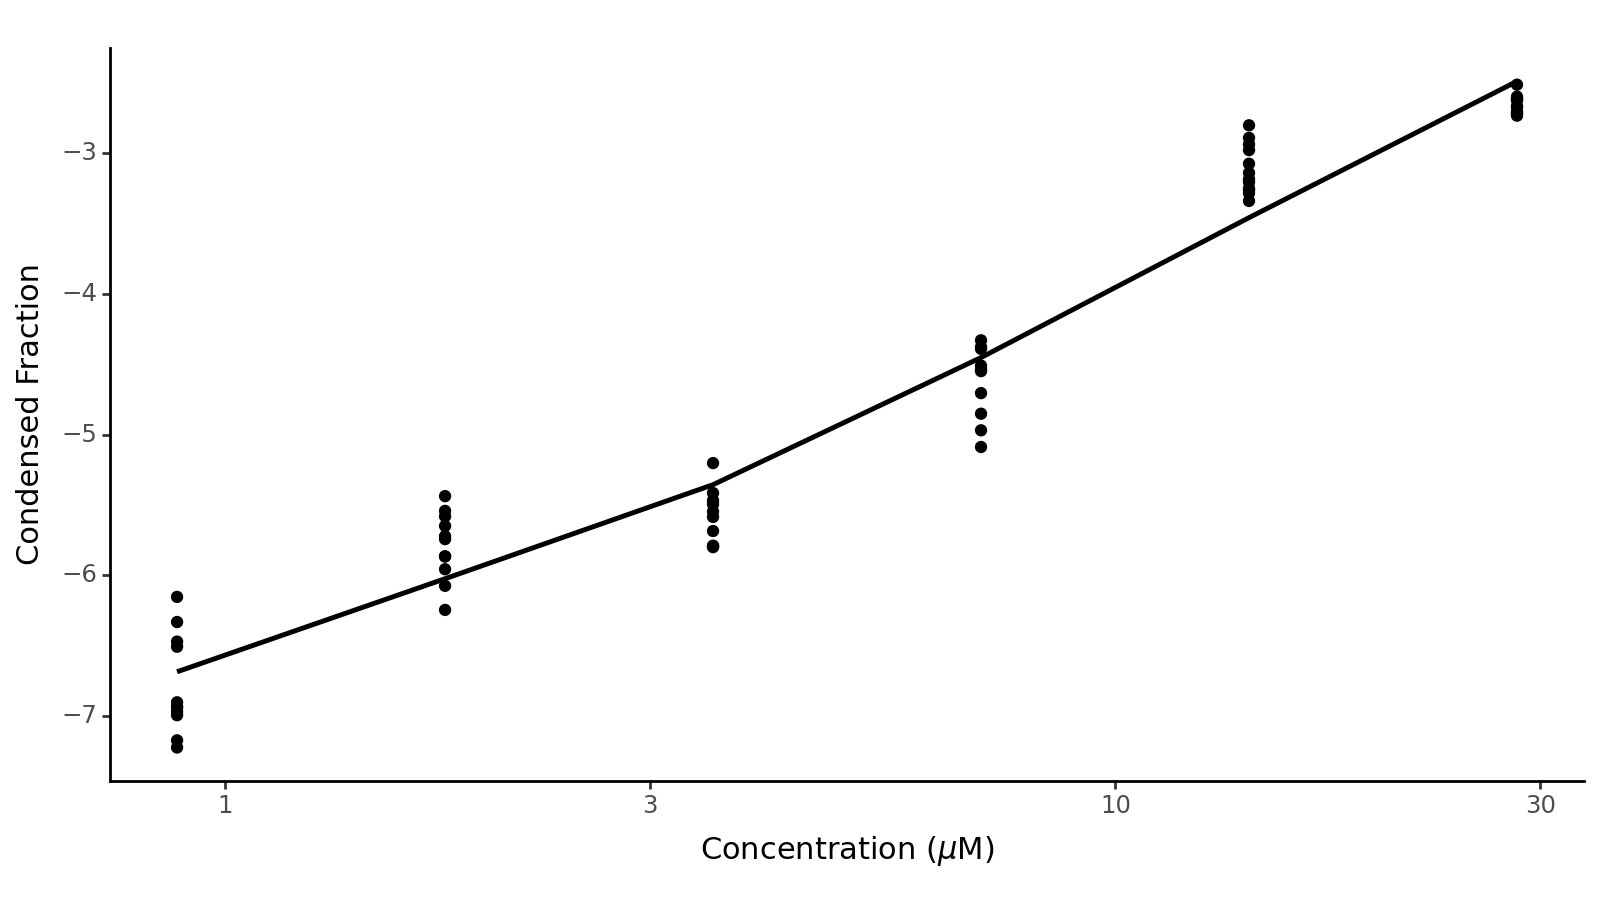

<Figure Size: (800 x 450)>

In [50]:
(
        pn.ggplot(condensed_fractions, pn.aes(x="conc", y="log_cf"))
        + pn.geom_point()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction")
        # Add more ticks on x axis
        + pn.scale_x_log10()
        + pn.theme_classic()
        + pn.theme(figure_size=(8, 4.5))

)